In [1]:
# https://datascience.quantecon.org/scientific/optimization.html

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

# Consumer Theory

Text(0, 0.5, 'U(B=1.5, A)')

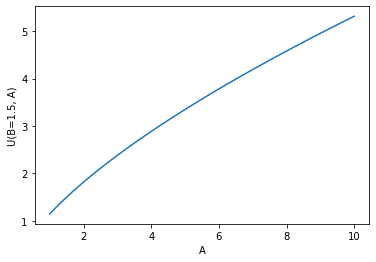

In [125]:
def U(A, B, alpha=1/3):
    return B**alpha * A**(1-alpha)

fig, ax = plt.subplots()
B = 1.5
A = np.linspace(1, 10, 100)
ax.plot(A, U(A, B))
ax.set_xlabel("A")
ax.set_ylabel("U(B=1.5, A)")

Text(0.5, 1.0, 'U(A,B)')

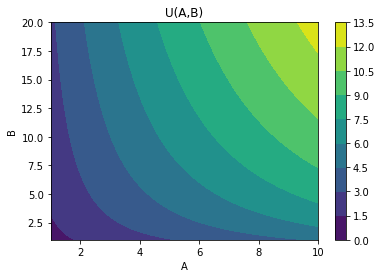

In [126]:
fig, ax = plt.subplots()
B = np.linspace(1, 20, 100).reshape((100, 1))
contours = ax.contourf(A, B.flatten(), U(A, B))
fig.colorbar(contours)
ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_title("U(A,B)")

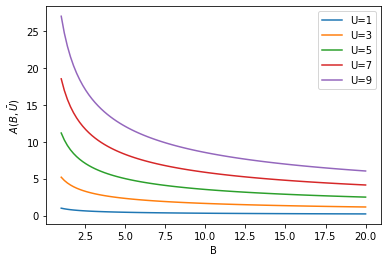

In [151]:
def A_indifference(B, ubar, alpha=1/3):
    return ubar**(1/(1-alpha)) * B**(-alpha/(1-alpha))

def plot_indif(ax, utility, alpha=1/3):
    label = "U="+str(utility)
    ax.plot(B, A_indifference(B, utility, alpha), label=label)
    ax.legend(loc='best')

def plot_indifference_curves(ax, alpha=1/3):
    ubar = np.arange(1, 11, 2)
#     ax.plot(B, A_indifference(B, ubar, alpha))
#     ax.legend([r"$\bar{U}$" + " = {}".format(i) for i in ubar])
    for i in ubar:
        plot_indif(ax, i)
    ax.set_xlabel("B")
    ax.set_ylabel(r"$A(B, \bar{U}$)")


    
fig, ax = plt.subplots()
plot_indifference_curves(ax)

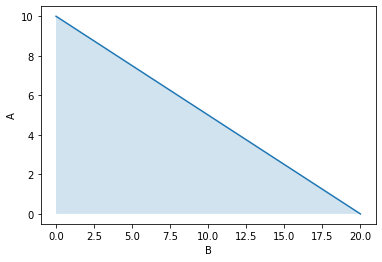

In [134]:
def A_bc(B, W=20, pa=2):
    "Given B, W, and pa return the max amount of A our consumer can afford"
    return (W - B) / pa

def plot_budget_constraint(ax, W=20, pa=2):
    B_bc = np.array([0, W])
    A = A_bc(B_bc, W, pa)
    ax.plot(B_bc, A)
    ax.fill_between(B_bc, 0, A, alpha=0.2)
    ax.set_xlabel("B")
    ax.set_ylabel("A")
    return ax

fig, ax = plt.subplots()
plot_budget_constraint(ax, 20, 2)

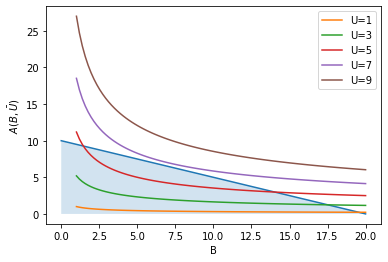

In [153]:
fig, ax = plt.subplots()
plot_budget_constraint(ax)
plot_indifference_curves(ax)

In [130]:
from scipy.optimize import minimize_scalar

def objective(B, W=20, pa=2):
    """
    Return value of -U for a given B, when we consume as much A as possible

    Note that we return -U because scipy wants to minimize functions,
    and the value of B that minimizes -U will maximize U
    """
    A = A_bc(B, W, pa)
    return -U(A, B)

result = minimize_scalar(objective)
optimal_B = result.x
optimal_A = A_bc(optimal_B, 20, 2)
optimal_U = U(optimal_A, optimal_B)

print("The optimal U is ", optimal_U)
print("and was found at (A,B) =", (optimal_A, optimal_B))

The optimal U is  6.666666666666667
and was found at (A,B) = (6.666666630651958, 6.666666738696083)


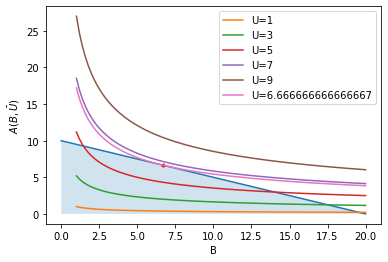

In [154]:
def plot_point(ax, a, b):
    ax.plot([b], [a], marker='o', markersize=3, color="red")
    
# fig, ax = plt.subplots()
plot_point(ax, 6.666666630651958, 6.666666738696083)
plot_indif(ax, 6.666666666666667)
fig

To Do
1. Make this whole thing into a function that returns
    - Graph of budget curve, indifference curves, optimal point
    - Tuple of optimal point and optimal utility
1. Inputs
    - Budget
    - Price 1
    - Utility Func 1
    - Price 2
    - Utility Func 2
1. Extend to array of items. Might be hard to plot though unless we plot as we go

Stretched Scope
1. Can I use this in a real world example